In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
import math
%matplotlib inline

C:\Users\Jovan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Initial Assessment

In [2]:
df = pd.read_csv("training_data_small.csv")

In [3]:
df.head()

,LATITUDE,LONGITUDE,AGE,YEARS_WITH_COMPANY,ANNUAL_KILOMETERS,DAILY_KILOMETERS,YEARS_LICENSED,VEHICLE_YEAR,NUMBER_OF_DRIVERS,NUMBER_OF_VEHICLES,...,INCURRED_LOSS_DCPD,GENDER,DRIVER_MARTIAL_STATUS,DRIVER_TRAINING_IND,VEHICLE_AGE,YEARS_SINCE_AT_FAULT_CLAIM,YEARS_SINCE_NOT_AT_FAULT_CLAIM,YEARS_SINCE_MINOR_CONVICTION,YEARS_SINCE_MAJOR_CONVICTION,YEARS_SINCE_SERIOUS_CONVICTION
0,45.628860,-82.998975,61.0,8.0,12000.0,2.0,39.0,2004.0,1.0,NaN,...,0,F,S,N,12.0,0.0,0.0,NaN,NaN,NaN
1,45.936701,-79.128749,45.0,5.0,13000.0,9.0,25.0,2006.0,1.0,2.0,...,0,M,M,N,7.0,NaN,NaN,NaN,NaN,NaN
2,49.569043,-82.735914,52.0,9.0,12000.0,1.0,32.0,2005.0,2.0,NaN,...,0,F,M,N,8.0,NaN,2.0,NaN,NaN,NaN
3,44.014425,-77.216511,51.0,8.0,10000.0,5.0,31.0,2005.0,2.0,2.0,...,0,F,NaN,N,8.0,4.0,NaN,NaN,NaN,NaN
4,45.687426,-77.924946,47.0,3.0,12000.0,5.0,24.0,2002.0,1.0,2.0,...,0,F,M,N,15.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.dtypes

LATITUDE                          float64
LONGITUDE                         float64
AGE                               float64
YEARS_WITH_COMPANY                float64
ANNUAL_KILOMETERS                 float64
DAILY_KILOMETERS                  float64
YEARS_LICENSED                    float64
VEHICLE_YEAR                      float64
NUMBER_OF_DRIVERS                 float64
NUMBER_OF_VEHICLES                float64
PRIOR_COMPANY                     float64
DEDUCTIBLE_COLLISION              float64
DEDUCTIBLE_COMPREHENSIVE          float64
DEDUCTIBLE_DCPD                   float64
PAYMENT_METHOD                    float64
AT_FAULT_CLAIMS                   float64
NOT_AT_FAULT_CLAIMS               float64
MINOR_CONVICTIONS                 float64
MAJOR_CONVICTIONS                 float64
SERIOUS_CONVICTIONS               float64
DRIVING_EXPERIENCE                float64
YEARS_WITH_PRIOR_COMPANY          float64
INCURRED_LOSS_COLLISION             int64
INCURRED_LOSS_COMPREHENSIVE       

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
LATITUDE                          98392 non-null float64
LONGITUDE                         95702 non-null float64
AGE                               99214 non-null float64
YEARS_WITH_COMPANY                98794 non-null float64
ANNUAL_KILOMETERS                 95455 non-null float64
DAILY_KILOMETERS                  98643 non-null float64
YEARS_LICENSED                    98506 non-null float64
VEHICLE_YEAR                      96208 non-null float64
NUMBER_OF_DRIVERS                 96235 non-null float64
NUMBER_OF_VEHICLES                91029 non-null float64
PRIOR_COMPANY                     98769 non-null float64
DEDUCTIBLE_COLLISION              98341 non-null float64
DEDUCTIBLE_COMPREHENSIVE          99015 non-null float64
DEDUCTIBLE_DCPD                   90966 non-null float64
PAYMENT_METHOD                    85583 non-null float64
AT_FAULT_CLAIMS                   9

In [6]:
df["TOTAL_LOSS"]=df["INCURRED_LOSS_COLLISION"] + df["INCURRED_LOSS_COMPREHENSIVE"] + df["INCURRED_LOSS_DCPD"]

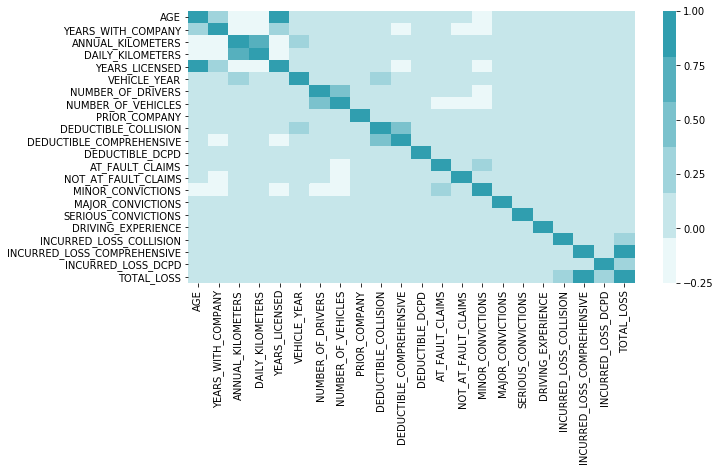

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df[['AGE', 'YEARS_WITH_COMPANY',
       'ANNUAL_KILOMETERS', 'DAILY_KILOMETERS', 'YEARS_LICENSED',
       'VEHICLE_YEAR', 'NUMBER_OF_DRIVERS', 'NUMBER_OF_VEHICLES',
       'PRIOR_COMPANY', 'DEDUCTIBLE_COLLISION', 'DEDUCTIBLE_COMPREHENSIVE',
       'DEDUCTIBLE_DCPD','AT_FAULT_CLAIMS',
       'NOT_AT_FAULT_CLAIMS', 'MINOR_CONVICTIONS', 'MAJOR_CONVICTIONS',
       'SERIOUS_CONVICTIONS', 'DRIVING_EXPERIENCE','INCURRED_LOSS_COLLISION', 'INCURRED_LOSS_COMPREHENSIVE',
       'INCURRED_LOSS_DCPD','TOTAL_LOSS']].corr(),cmap = sns.light_palette((210, 90, 60), input="husl"))

In [8]:
df.drop(['DAILY_KILOMETERS','YEARS_LICENSED','DRIVING_EXPERIENCE','YEARS_WITH_PRIOR_COMPANY'],inplace=True,axis=1)

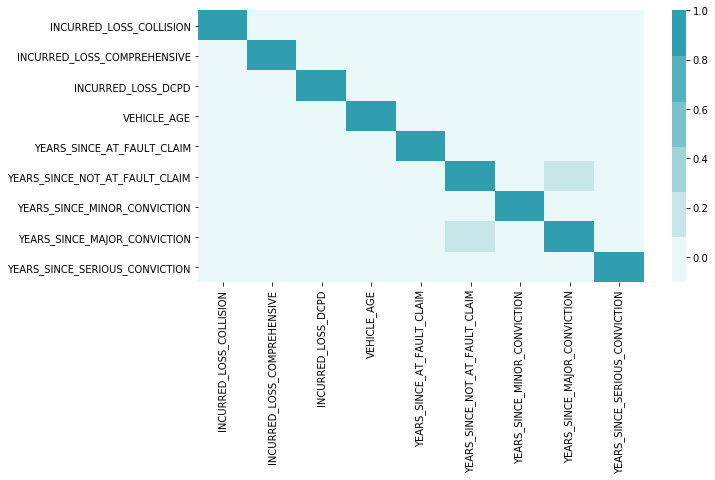

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df[['INCURRED_LOSS_COLLISION', 'INCURRED_LOSS_COMPREHENSIVE',
       'INCURRED_LOSS_DCPD', 'GENDER', 'DRIVER_MARTIAL_STATUS',
       'DRIVER_TRAINING_IND', 'VEHICLE_AGE', 'YEARS_SINCE_AT_FAULT_CLAIM',
       'YEARS_SINCE_NOT_AT_FAULT_CLAIM', 'YEARS_SINCE_MINOR_CONVICTION',
       'YEARS_SINCE_MAJOR_CONVICTION', 'YEARS_SINCE_SERIOUS_CONVICTION']].corr(),cmap = sns.light_palette((210, 90, 60), input="husl"))

In [10]:
df.drop(["YEARS_SINCE_AT_FAULT_CLAIM","YEARS_SINCE_NOT_AT_FAULT_CLAIM","YEARS_SINCE_MINOR_CONVICTION","YEARS_SINCE_MAJOR_CONVICTION","YEARS_SINCE_SERIOUS_CONVICTION","PAYMENT_METHOD"],inplace=True,axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
LATITUDE                       98392 non-null float64
LONGITUDE                      95702 non-null float64
AGE                            99214 non-null float64
YEARS_WITH_COMPANY             98794 non-null float64
ANNUAL_KILOMETERS              95455 non-null float64
VEHICLE_YEAR                   96208 non-null float64
NUMBER_OF_DRIVERS              96235 non-null float64
NUMBER_OF_VEHICLES             91029 non-null float64
PRIOR_COMPANY                  98769 non-null float64
DEDUCTIBLE_COLLISION           98341 non-null float64
DEDUCTIBLE_COMPREHENSIVE       99015 non-null float64
DEDUCTIBLE_DCPD                90966 non-null float64
AT_FAULT_CLAIMS                98631 non-null float64
NOT_AT_FAULT_CLAIMS            86744 non-null float64
MINOR_CONVICTIONS              95258 non-null float64
MAJOR_CONVICTIONS              99087 non-null float64
SERIOUS_CONVICTIONS       

In [12]:
df.drop(["LATITUDE","LONGITUDE"],axis=1).dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44403 entries, 4 to 99999
Data columns (total 23 columns):
AGE                            44403 non-null float64
YEARS_WITH_COMPANY             44403 non-null float64
ANNUAL_KILOMETERS              44403 non-null float64
VEHICLE_YEAR                   44403 non-null float64
NUMBER_OF_DRIVERS              44403 non-null float64
NUMBER_OF_VEHICLES             44403 non-null float64
PRIOR_COMPANY                  44403 non-null float64
DEDUCTIBLE_COLLISION           44403 non-null float64
DEDUCTIBLE_COMPREHENSIVE       44403 non-null float64
DEDUCTIBLE_DCPD                44403 non-null float64
AT_FAULT_CLAIMS                44403 non-null float64
NOT_AT_FAULT_CLAIMS            44403 non-null float64
MINOR_CONVICTIONS              44403 non-null float64
MAJOR_CONVICTIONS              44403 non-null float64
SERIOUS_CONVICTIONS            44403 non-null float64
INCURRED_LOSS_COLLISION        44403 non-null int64
INCURRED_LOSS_COMPREHENSIVE  

In [13]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41789 entries, 4 to 99999
Data columns (total 25 columns):
LATITUDE                       41789 non-null float64
LONGITUDE                      41789 non-null float64
AGE                            41789 non-null float64
YEARS_WITH_COMPANY             41789 non-null float64
ANNUAL_KILOMETERS              41789 non-null float64
VEHICLE_YEAR                   41789 non-null float64
NUMBER_OF_DRIVERS              41789 non-null float64
NUMBER_OF_VEHICLES             41789 non-null float64
PRIOR_COMPANY                  41789 non-null float64
DEDUCTIBLE_COLLISION           41789 non-null float64
DEDUCTIBLE_COMPREHENSIVE       41789 non-null float64
DEDUCTIBLE_DCPD                41789 non-null float64
AT_FAULT_CLAIMS                41789 non-null float64
NOT_AT_FAULT_CLAIMS            41789 non-null float64
MINOR_CONVICTIONS              41789 non-null float64
MAJOR_CONVICTIONS              41789 non-null float64
SERIOUS_CONVICTIONS        

### Incurred Losses

In [14]:
ICL = df[["INCURRED_LOSS_COLLISION", "INCURRED_LOSS_DCPD", "INCURRED_LOSS_COMPREHENSIVE"]].copy()

“Coverage against perils other than collision or upset”, previously called Comprehensive, protects you from costs to repair damage to your vehicle from unexpected situations such as fire, theft, vandalism or natural disasters.

Collision and Upset coverage protects you from costs to repair damage to your vehicle caused by impact with another vehicle or an object such as a guardrail.

DCPD-provides you with compensation when you or your car is damaged in an accident where you are not at fault. 

In [15]:
ICL.describe()

,INCURRED_LOSS_COLLISION,INCURRED_LOSS_DCPD,INCURRED_LOSS_COMPREHENSIVE
count,100000.000000,100000.000000,100000.000000
mean,822.448930,888.085790,2031.946800
std,3657.800947,3853.230232,8792.289041
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,86659.000000,25641.000000,74442.000000


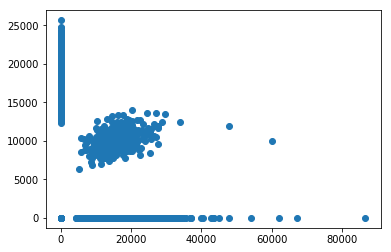

In [16]:
plt.scatter(df["INCURRED_LOSS_COLLISION"],df["INCURRED_LOSS_DCPD"])

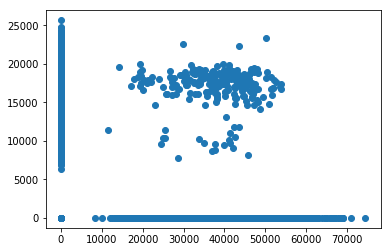

In [17]:
plt.scatter(df["INCURRED_LOSS_COMPREHENSIVE"],df["INCURRED_LOSS_DCPD"])

### Relationship with Deductible

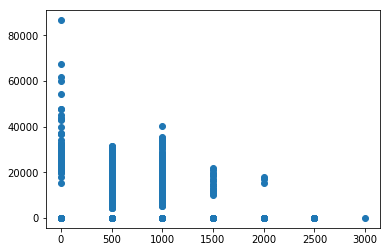

In [19]:
plt.scatter(df["DEDUCTIBLE_COLLISION"],df["INCURRED_LOSS_COLLISION"])

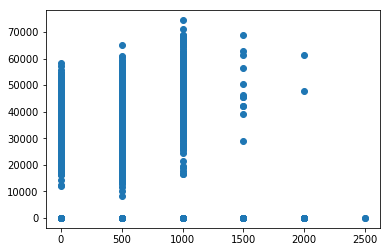

In [20]:
plt.scatter(df["DEDUCTIBLE_COMPREHENSIVE"],df["INCURRED_LOSS_COMPREHENSIVE"])

# Model Fitting

### Linear Regression

In [21]:
model_df = df.dropna()

In [ ]:
df.columns

In [25]:
model_df['INTERCEPT']=1
X = ['INTERCEPT','AGE', 'YEARS_WITH_COMPANY',
       'ANNUAL_KILOMETERS', 'VEHICLE_YEAR', 'NUMBER_OF_DRIVERS',
       'NUMBER_OF_VEHICLES', 'PRIOR_COMPANY', 'DEDUCTIBLE_COLLISION',
       'DEDUCTIBLE_COMPREHENSIVE', 'DEDUCTIBLE_DCPD', 'AT_FAULT_CLAIMS',
       'NOT_AT_FAULT_CLAIMS', 'MINOR_CONVICTIONS', 'MAJOR_CONVICTIONS',
       'SERIOUS_CONVICTIONS']
lm=sm.OLS(model_df['TOTAL_LOSS'],model_df[X])
results = lm.fit()
results.summary()

C:\Users\Jovan\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TOTAL_LOSS   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.794
Date:                Sat, 27 Jul 2019   Prob (F-statistic):           0.000233
Time:                        08:24:38   Log-Likelihood:            -4.4502e+05
No. Observations:               41789   AIC:                         8.901e+05
Df Residuals:                   41773   BIC:                         8.902e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
INTERCEPT                -1.276e+05   6.48e+04     -1.969      0.049   -2.55e+05    -600.448
AGE                        -37.5483     10.145     -3.701      0.000     -57.434     -17.663
YEARS_WITH_COMPANY         -16.6786     23.682     -0.704      0.481     -63.097      29.740
ANNUAL_KILOMETERS           -0.0044      0.026     -0.167      0.867      -0.056       0.047
VEHICLE_YEAR                66.3380     32.383      2.049      0.041       2.866     129.810
NUMBER_OF_DRIVERS          -54.0872    105.270     -0.514      0.607    -260.419     152.244
NUMBER_OF_VEHICLES         223.2554    104.229      2.142      0.032      18.964     427.547
PRIOR_COMPANY               -7.5316      9.649     -0.781      0.435     -26.443      11.380
DEDUCTIBLE_COLLISION         0.3740      0.240      1.562      0.118      -0.095       0.843
DEDUCTIBLE_COMPREHENSIVE     0.0164      0.232      0.071      0.944      -0.438       0.471
DEDUCTIBLE_DCPD             -1.4495      0.465     -3.119      0.002      -2.360      -0.539
AT_FAULT_CLAIMS            -32.0585    116.397     -0.275      0.783    -260.198     196.081
NOT_AT_FAULT_CLAIMS         56.5327    109.339      0.517      0.605    -157.773     270.839
MINOR_CONVICTIONS         -117.2797    153.076     -0.766      0.444    -417.311     182.752
MAJOR_CONVICTIONS          421.1610    633.615      0.665      0.506    -820.737    1663.059
SERIOUS_CONVICTIONS       -220.2233    667.489     -0.330      0.741   -1528.516    1088.070
==============================================================================
Omnibus:                    26012.110   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           213521.913
Skew:                           3.042   Prob(JB):                         0.00
Kurtosis:                      12.253   Cond. No.                     1.57e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

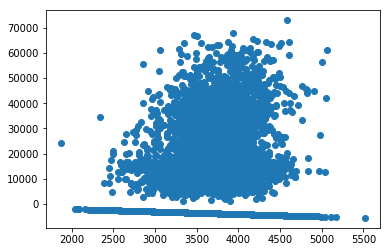

In [26]:
plt.scatter(results.predict(model_df[X]),results.resid)

## Model 2 after removing 0

In [29]:
no_zero = model_df[model_df["TOTAL_LOSS"]>0]

In [30]:
lm2=sm.OLS(no_zero['TOTAL_LOSS'],no_zero[X])
results2 = lm2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TOTAL_LOSS   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     11.04
Date:                Sat, 27 Jul 2019   Prob (F-statistic):           4.79e-27
Time:                        08:25:29   Log-Likelihood:                -67696.
No. Observations:                6237   AIC:                         1.354e+05
Df Residuals:                    6221   BIC:                         1.355e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
INTERCEPT                -5.138e+05   2.08e+05     -2.467      0.014   -9.22e+05   -1.06e+05
AGE                       -136.5793     31.740     -4.303      0.000    -198.800     -74.358
YEARS_WITH_COMPANY        -132.5994     74.461     -1.781      0.075    -278.568      13.369
ANNUAL_KILOMETERS            0.0060      0.084      0.072      0.943      -0.159       0.171
VEHICLE_YEAR               270.2868    104.052      2.598      0.009      66.310     474.264
NUMBER_OF_DRIVERS          221.4562    337.229      0.657      0.511    -439.628     882.541
NUMBER_OF_VEHICLES        1777.5501    330.801      5.373      0.000    1129.066    2426.034
PRIOR_COMPANY               -8.5442     30.282     -0.282      0.778     -67.908      50.820
DEDUCTIBLE_COLLISION         2.1588      0.766      2.819      0.005       0.658       3.660
DEDUCTIBLE_COMPREHENSIVE     1.2307      0.739      1.665      0.096      -0.218       2.679
DEDUCTIBLE_DCPD            -11.3630      1.459     -7.790      0.000     -14.222      -8.504
AT_FAULT_CLAIMS            504.7760    372.675      1.354      0.176    -225.795    1235.347
NOT_AT_FAULT_CLAIMS       -803.2090    344.214     -2.333      0.020   -1477.987    -128.431
MINOR_CONVICTIONS         -238.0781    488.402     -0.487      0.626   -1195.514     719.358
MAJOR_CONVICTIONS        -1908.2582   1856.285     -1.028      0.304   -5547.218    1730.701
SERIOUS_CONVICTIONS       1007.4869   2223.229      0.453      0.650   -3350.809    5365.783
==============================================================================
Omnibus:                      663.954   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              897.514
Skew:                           0.927   Prob(JB):                    1.28e-195
Kurtosis:                       2.876   Cond. No.                     1.59e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

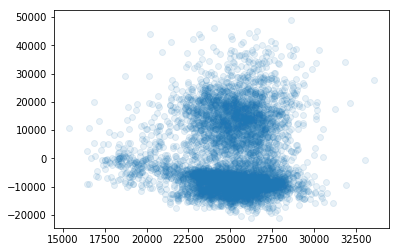

In [31]:
plt.scatter(results2.predict(no_zero[X]),results2.resid,alpha=0.1)

## Random Forest Regressor

In [ ]:
clf = DecisionTreeRegressor(random_state=1)